# Checkpoint logistic Regression By SERRAI Sihem Chourouk

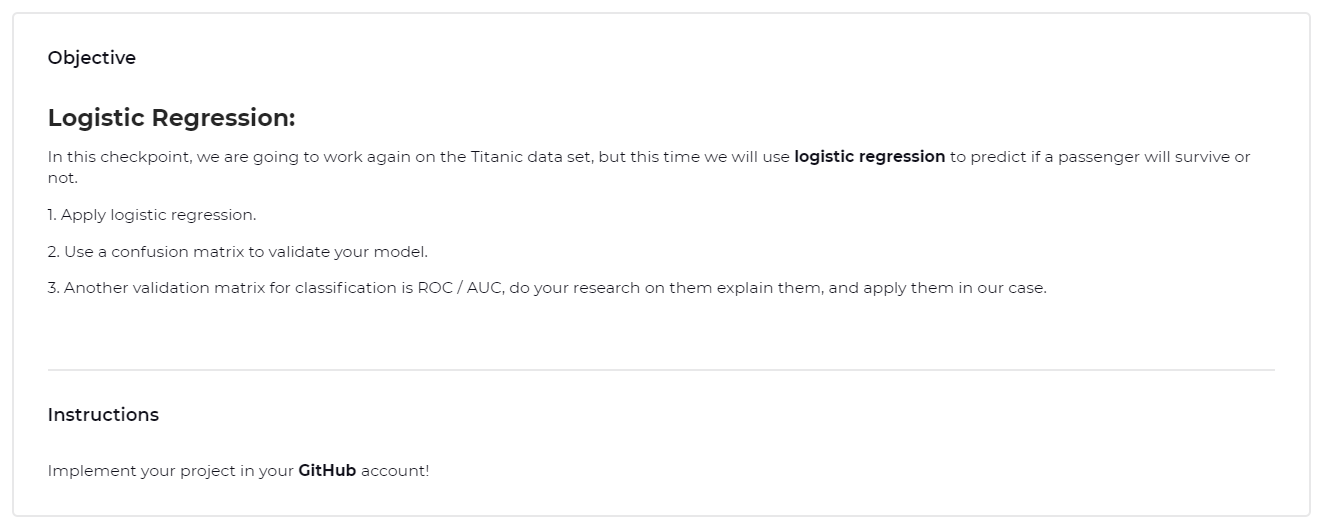

## Import Libraries

In [242]:
# import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data into Pandas DataFrame

In [243]:
TITANIC_file = "titanic-passengers"
TITANIC_data = pd.read_csv("titanic-passengers.csv", sep=';')
TITANIC_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


### Verify Data imported

In [244]:
TITANIC_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### Explore Dataset

In [245]:
TITANIC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [246]:
len(TITANIC_data)

891

In [247]:
TITANIC_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [248]:
TITANIC_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [249]:
TITANIC_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replace Survived target  YES NO with 0 1

In [250]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
TITANIC_data['Survived']=encoder.fit_transform(TITANIC_data['Survived'])
TITANIC_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [251]:
survived = TITANIC_data[TITANIC_data['Survived']==1]
no_survived = TITANIC_data[TITANIC_data['Survived']==0]

In [252]:
print('Total Passengers = ', len(TITANIC_data))
print('Number of Passengers who survived = ', len(survived))
print('Number of Passengers who died = ', len(no_survived))
print('% Survived = ', 1 * len(survived)/len(TITANIC_data) * 100)
print('% Died = ', 1 * len(no_survived)/len(TITANIC_data) * 100)

Total Passengers =  891
Number of Passengers who survived =  342
Number of Passengers who died =  549
% Survived =  38.38383838383838
% Died =  61.61616161616161


###  Survived =  38.38 %
###  Died =  61.61%

## Now we will check the proportion of survivors and non-survivors according to the variables of our dataset _TITANIC_data

### Plot Passenger class numbers

<AxesSubplot:xlabel='Pclass', ylabel='count'>

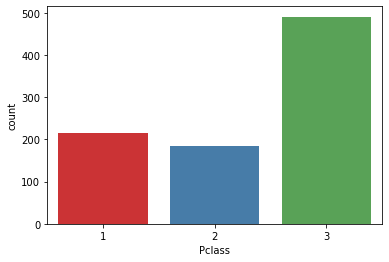

In [253]:
sns.countplot(x = 'Pclass', data = TITANIC_data, palette="Set1")

### Plot Passenger survival by class numbers

<AxesSubplot:xlabel='Pclass', ylabel='count'>

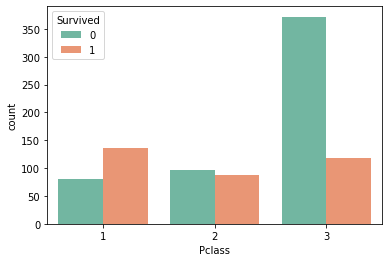

In [254]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = TITANIC_data, palette="Set2")

We can observe that the majority of the people who did not survive on the Titanic were third class people.

### Plot Passenger siblings "SibSp"

<AxesSubplot:xlabel='SibSp', ylabel='count'>

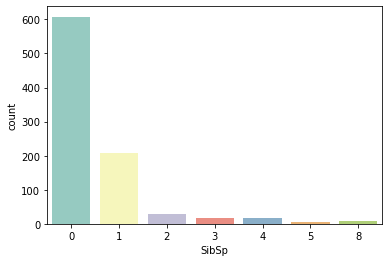

In [255]:
sns.countplot(x = 'SibSp', data = TITANIC_data, palette="Set3")

### Plot Passenger survival with siblings

<AxesSubplot:xlabel='SibSp', ylabel='count'>

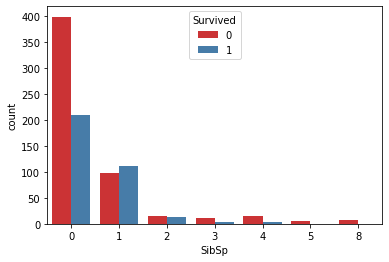

In [256]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = TITANIC_data, palette="Set1" )

It can be noticed that the case of survived peopole in relation to the siblings is very small.

0 siblings= no sibling relationship which is the major case /
1 siblings= almost 100 cases of saved siblings / preil for unsaved ... etc

### Plot Passengers with Parent / child

<AxesSubplot:xlabel='Parch', ylabel='count'>

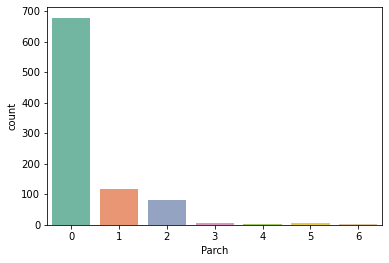

In [257]:
sns.countplot(x = 'Parch', data = TITANIC_data, palette="Set2")

### Plot Passenger survival with Parent / child

<AxesSubplot:xlabel='Parch', ylabel='count'>

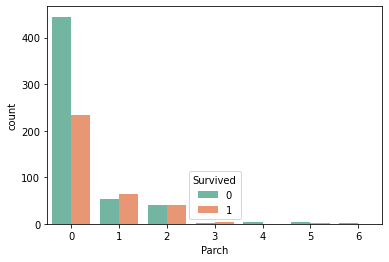

In [258]:
sns.countplot(x = 'Parch', hue = 'Survived', data = TITANIC_data, palette="Set2")

The same case for Passenger survival with Parent / child, like the previouse case, It can be noticed that the case of survived peopole in relation to the Parch is very small.

0 Parch = no Parch relationship which is the major case / 1 Parch= almost 80 cases of saved siblings / preil for unsaved ... etc

### Plot Passengers Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

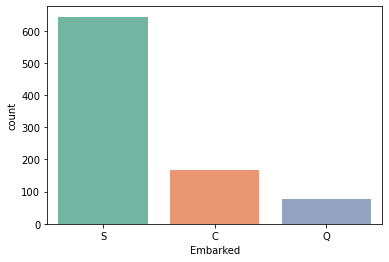

In [259]:
sns.countplot(x = 'Embarked', data = TITANIC_data, palette="Set2")

### Plot Passenger survival from Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

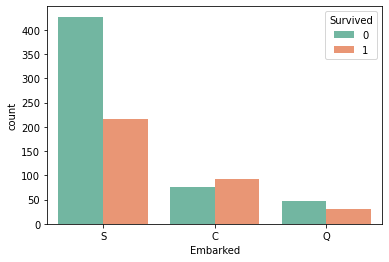

In [260]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = TITANIC_data, palette="Set2")

### Plot Passengers Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

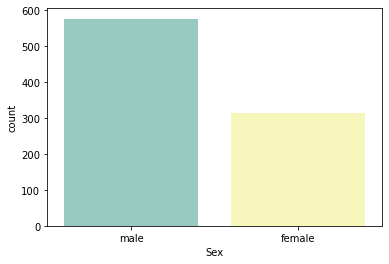

In [261]:
sns.countplot(x = 'Sex', data = TITANIC_data, palette="Set3")

### Plot Passengers Sex Survival

<AxesSubplot:xlabel='Sex', ylabel='count'>

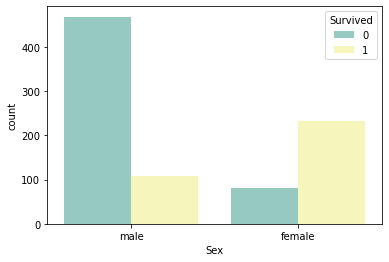

In [262]:
sns.countplot(x = 'Sex', hue = 'Survived', data = TITANIC_data,palette="Set3")

### Plot survival by Age

<AxesSubplot:xlabel='Age', ylabel='count'>

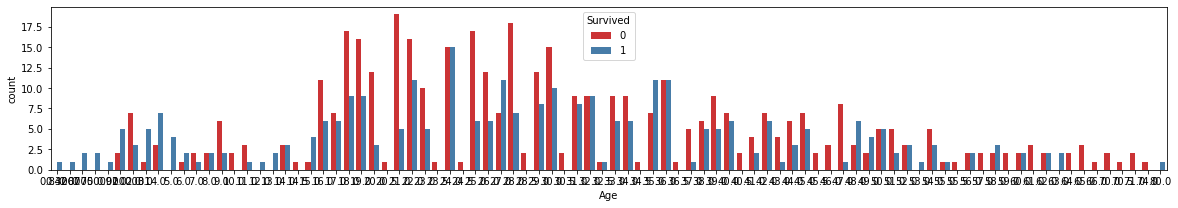

In [263]:
plt.figure(figsize =  (20,3))
sns.countplot(x = 'Age', hue = 'Survived', data = TITANIC_data,palette="Set1")

### Age categories

<AxesSubplot:>

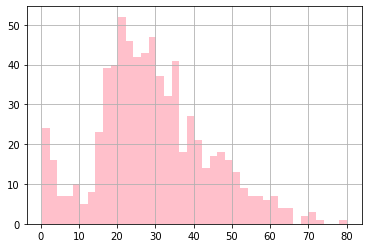

In [265]:
TITANIC_data['Age'].hist( bins = 40, color= "pink")

### Fare distribution 

<AxesSubplot:>

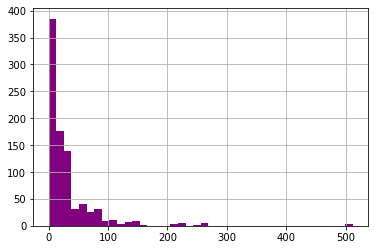

In [267]:
TITANIC_data['Fare'].hist(bins = 40, color= "purple")

## From the previous plots  survival by Age, Age categories, Passengers Sex Survival,Fare distribution, it can be noted that the priority categories that have been saved are children, women and the first class. 

### Cleaning Data

In [268]:
TITANIC_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


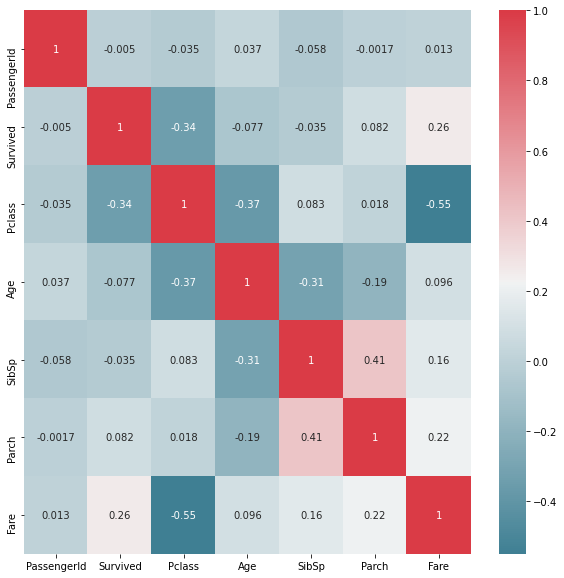

In [269]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(10,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(TITANIC_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(TITANIC_data)

### Nan Value _  Find out where NaNs occur, by sns.heatmap( _data.isnull())

<AxesSubplot:>

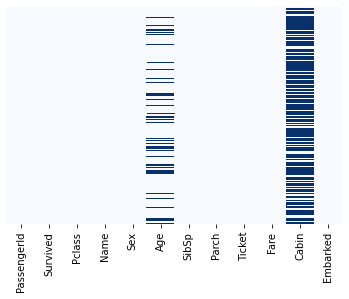

In [270]:
sns.heatmap(TITANIC_data.isnull(), yticklabels = False, cbar = False,  cmap = 'Blues')

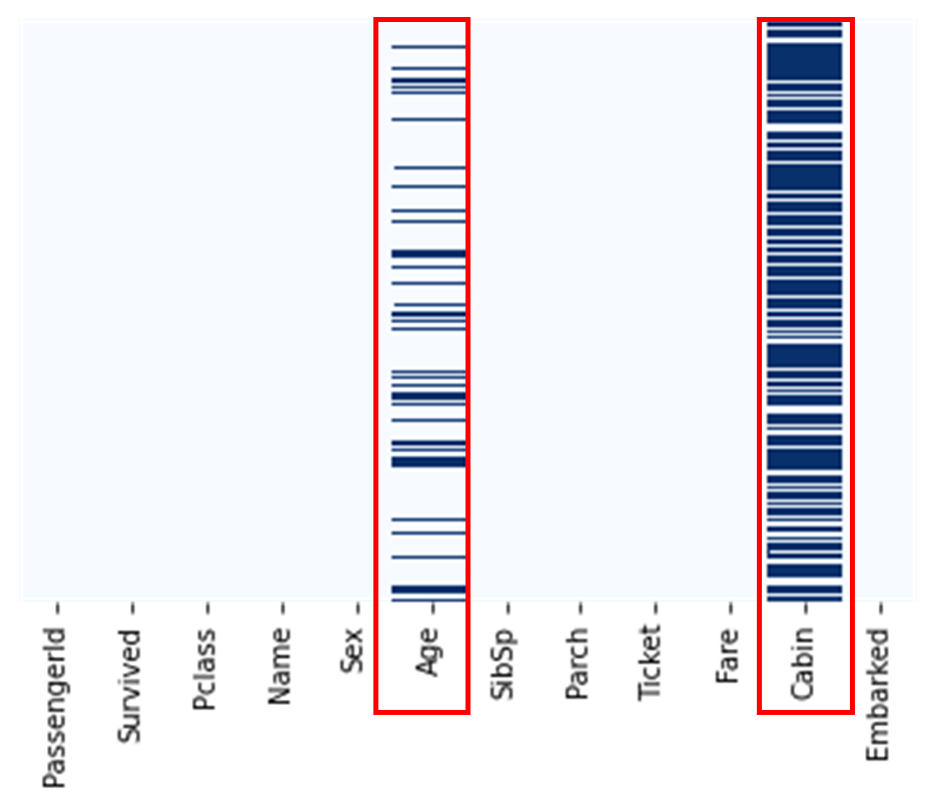

#### It can be noted that cabin and age are the two variables that contain missing values. Cabin has more missing values than age.

## Droping the columns that we don't need:

### Drop Cabin Data

In [271]:
TITANIC_data.drop('Cabin', axis = 1, inplace = True)

In [272]:
TITANIC_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S


### Drop rest of columns not needed

In [273]:
TITANIC_data.drop(['Name', 'Ticket','Embarked', 'PassengerId'], axis = 1, inplace = True)

In [239]:
TITANIC_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,No,2,male,28.0,0,0,13.0000,NaN
1,No,3,male,25.0,0,0,7.6500,F G73
2,No,3,male,20.0,0,0,7.8542,NaN


### Find out where NaNs missing values still occur

<AxesSubplot:>

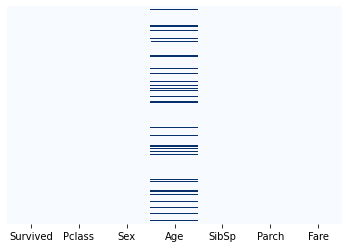

In [274]:
sns.heatmap(TITANIC_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

### The Age Data is important, so we can't drop it, However w'll fill the missing values by the avreges of the two gender (sex) female and male.

### Plot average ages

<AxesSubplot:xlabel='Sex', ylabel='Age'>

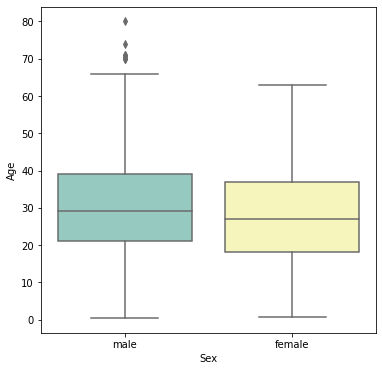

In [275]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Sex',y = 'Age', data = TITANIC_data, palette="Set3")

### Replace NaN Ages with average ages based on Sex

In [276]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 29
        else:
            return 25
    else:
        return age

In [277]:
TITANIC_data['Age'] = TITANIC_data[['Age', 'Sex'] ].apply(fill_age, axis = 1)

### Verify NaNs no longer apear

<AxesSubplot:>

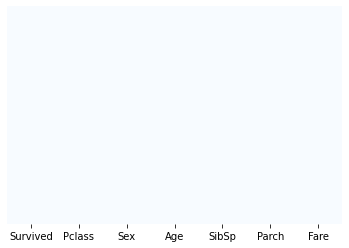

In [278]:
sns.heatmap(TITANIC_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

### The new distibution after replacing NaNs in Age's column


<AxesSubplot:>

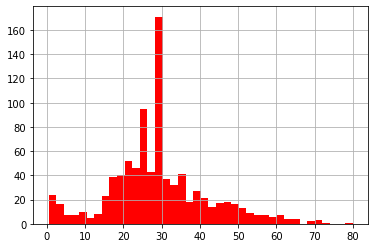

In [279]:
TITANIC_data['Age'].hist(bins = 40, color='red')

### May affect prediction results with such big changes

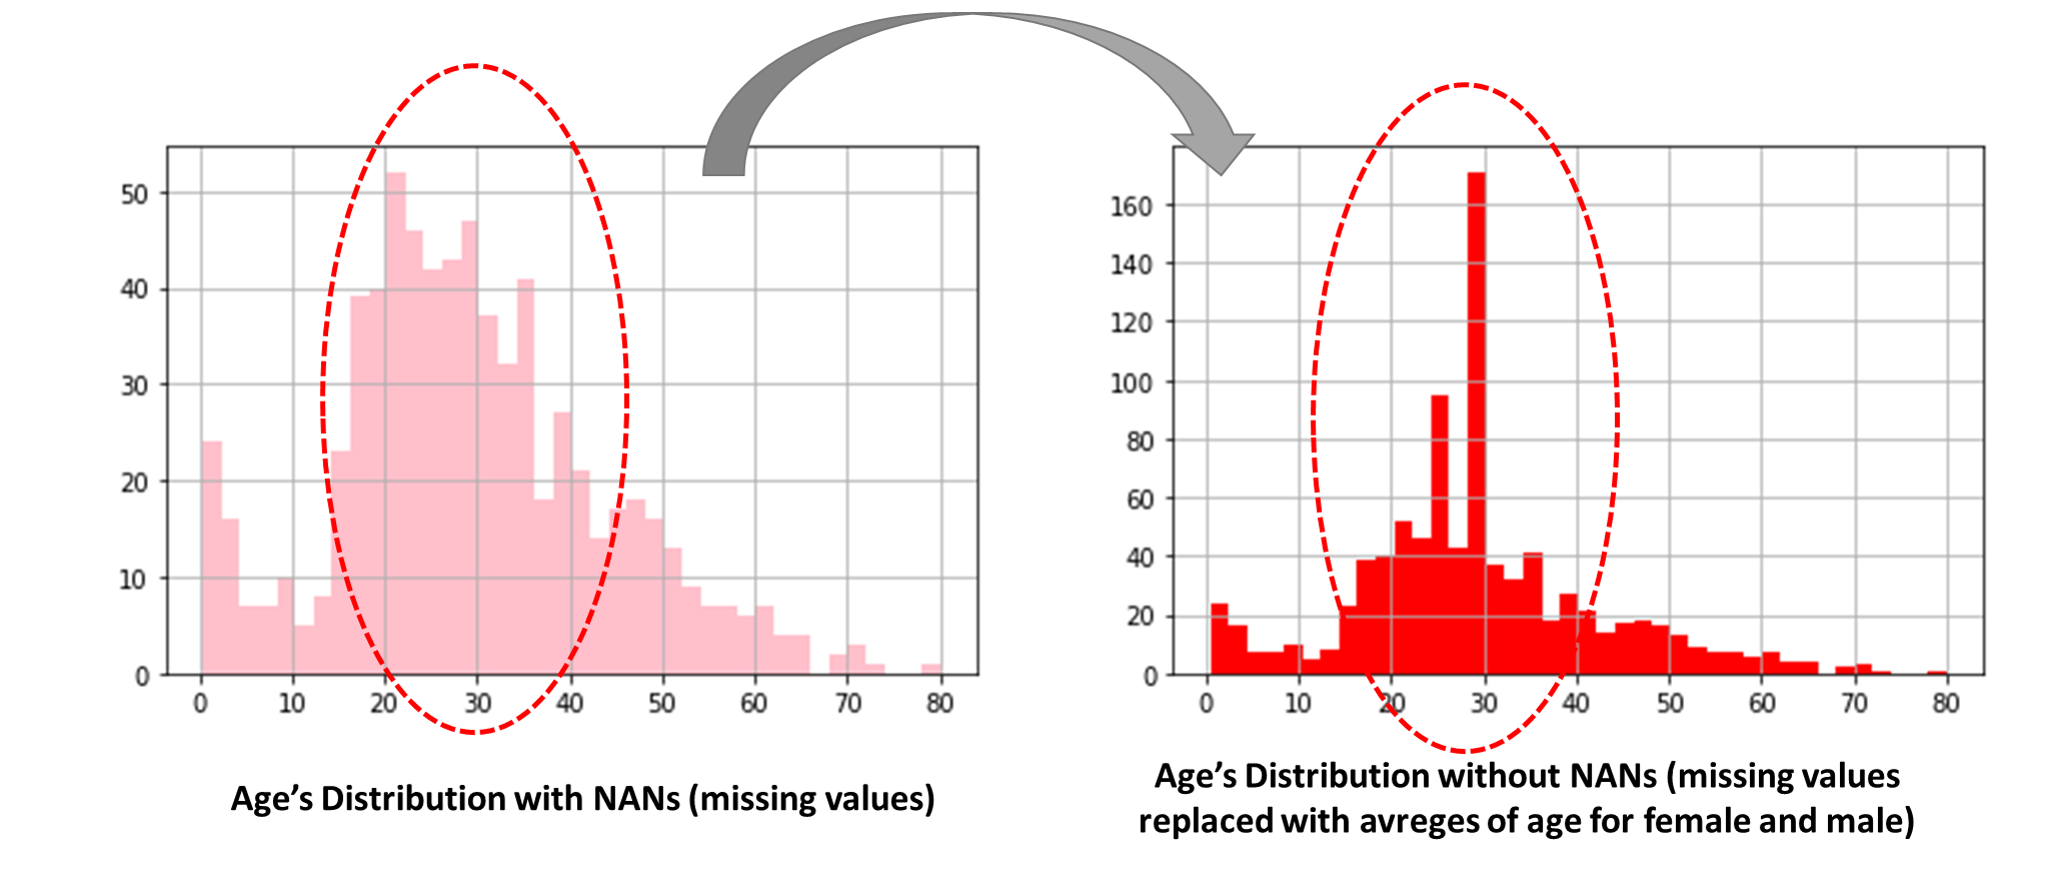

In [280]:
TITANIC_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,male,28.0,0,0,13.0000
1,0,3,male,25.0,0,0,7.6500
2,0,3,male,20.0,0,0,7.8542


In [281]:
male = pd.get_dummies(TITANIC_data['Sex'])
male.head(10)

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


### Drop column because we only need one

In [282]:
male = pd.get_dummies(TITANIC_data['Sex'],drop_first = True)
male.head(10)

,male
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,0


### Drop Sex Column

In [283]:
TITANIC_data.drop(['Sex'], axis = 1, inplace = True)

In [284]:
TITANIC_data = pd.concat([TITANIC_data, male], axis = 1)

In [285]:
TITANIC_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,2,28.0,0,0,13.0000,1
1,0,3,25.0,0,0,7.6500,1
2,0,3,20.0,0,0,7.8542,1
3,0,3,29.0,0,4,21.0750,0
4,0,1,31.0,1,0,52.0000,1


### Assign Data and Labels

In [286]:
X = TITANIC_data.drop('Survived', axis = 1).values

In [287]:
X

array([[ 2.    , 28.    ,  0.    ,  0.    , 13.    ,  1.    ],
       [ 3.    , 25.    ,  0.    ,  0.    ,  7.65  ,  1.    ],
       [ 3.    , 20.    ,  0.    ,  0.    ,  7.8542,  1.    ],
       ...,
       [ 3.    , 30.    ,  0.    ,  0.    ,  8.6625,  0.    ],
       [ 3.    , 29.    ,  0.    ,  0.    ,  7.8958,  1.    ],
       [ 2.    , 19.    ,  0.    ,  0.    , 26.    ,  0.    ]])

In [288]:
y = TITANIC_data['Survived'].values

In [289]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

# Training the Model

## Train Test Split the data

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Train Logistic Regression Model

In [291]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Model Evaluation

In [292]:
y_predict = classifier.predict(X_test)

In [293]:
y_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0])

In [294]:
from sklearn.metrics import confusion_matrix

In [295]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

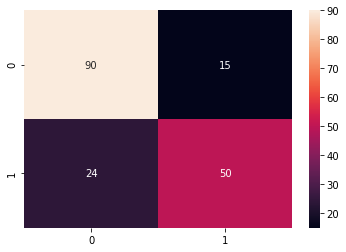

In [296]:
sns.heatmap(cm, annot = True, fmt = 'd')

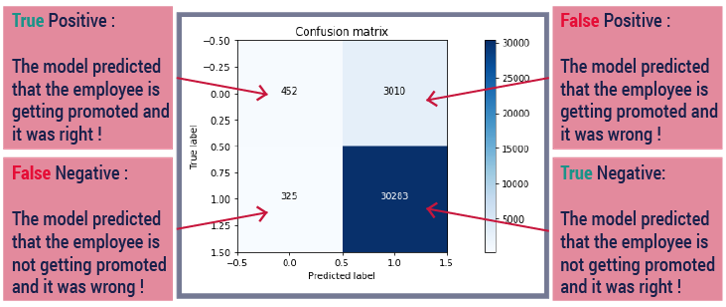

## Confusion Matrix Interpretation

In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# Simple Score output

In [298]:
classifier.score(X_test, y_test)

0.7821229050279329

# Shap Values _Explain all the predictions in the test set

In [299]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

# explain all the predictions in the test set
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

Using 712 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


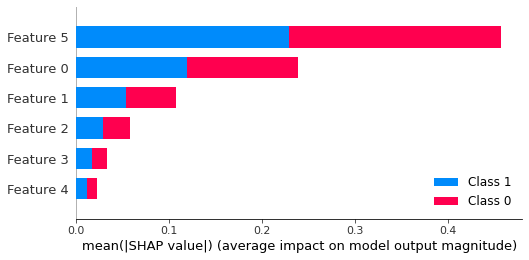

In [304]:
# Feature 5 = Sex .........    1st influencing factor 
# Feature 0 = Class ........   2nd influencing factor 
# Feature 2 = siblings......   3rd influencing factor
# Feature 1 = age ... .....    4th influencing factor
# Feature 4 = Fare ........    5th influencing factor
# Feature 3 = Parent / child.. 6th influencing factor
shap.summary_plot(shap_values)

In [302]:
X_train

array([[ 3.    , 70.5   ,  0.    ,  0.    ,  7.75  ,  1.    ],
       [ 3.    , 29.    ,  1.    ,  0.    ,  7.0458,  1.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ],
       ...,
       [ 3.    , 28.5   ,  0.    ,  0.    ,  7.2292,  1.    ],
       [ 3.    , 28.    ,  0.    ,  0.    ,  7.8958,  1.    ],
       [ 1.    , 49.    ,  0.    ,  0.    , 25.9292,  0.    ]])